# Exploratory Data Analysis - The Best Place for the Gym

## **Project Overview**
In this Project, we are to find the best neighborhoods for a Gym startup, in North York, Canada. 
We will also find out the top neighborhoods in North York that has Gym. This will help fitness freak and body builders choose their right neighborhood in North York, if they're planning to shift there.

## **FourSquare API**
The FourSquare API is what we shall use to fetch the details of venues in the neighborhoods of North York. FourSquare is a very popular location data provider, that powers some giant companies, like **Uber**.

## Machine Learning Algorithm used
In this Project, we will be using the **K-Means Clustering** algorithm to cluster the neighborhoods. As you will see, we shall cluster the neighborhoods into 4 groups. The K-Means Clustering is one of the most popular Clustering algorithms that is efficient as it runs fast. There remains a problem of finding the right value of **k**, that is the optimum number of clusters. However, the algorithm being pretty fast, running the clustering multiple times with different values of k, and then plotting a graph to note down the k for which the error is minimum (best k) is not an ordeal.

<hr>

In this project, we are using the Canadian postal code data from Wikipedia. We will gather the data by parsing the web page using Pandas' **read_html** method. We shall perform exploratory data analysis on the data to determine the ideal neighborhood for a Gym startup in _North York_, Canada. We will use the FourSquare API to fetch the location data and data about the venues in North York's neighborhoods.

## First, we import the required libraries

In [1]:
import numpy as np
import pandas as pd
import json # library to handle JSON files
from geopy.geocoders import Nominatim 

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library

## Define the data source url and read the data into a Pandas dataframe

In [2]:
url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"

In [3]:
df1, df2, df3 = pd.read_html(url)
print("Data successfully read into Pandas dataframe. Here's the first five rows:")
df1.head()

Data successfully read into Pandas dataframe. Here's the first five rows:


,Postal Code,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


However, there are some rows we need to get rid of. The Boroughs that are not assigned are not required, so let's drop them and clean the dataset.

## Cleaning the dataset

In [4]:
for row, item in enumerate(df1.Borough.tolist()):
    if item == "Not assigned":
        df1.drop(row, axis=0, inplace=True)
        
df1.set_index("Postal Code", inplace=True)
df1.reset_index(inplace=True)
df1.head()     # To view the first five rows of the cleaned dataset

,Postal Code,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


## Reading the Latitude and Longitude data from the CSV file

Now that we have the required dataset containing Postal code, Borough name and neighborhood name, we have to read the latitude and longitude data from the CSV file and add it to the dataset.

In [5]:
latlon_df = pd.read_csv("https://cocl.us/Geospatial_data")
latlon_df.set_index("Postal Code", inplace=True)
latlon_df.head()

,Latitude,Longitude
Postal Code,,
M1B,43.806686,-79.194353
M1C,43.784535,-79.160497
M1E,43.763573,-79.188711
M1G,43.770992,-79.216917
M1H,43.773136,-79.239476


In [6]:
new_df = pd.merge(df1, latlon_df, how='inner', on="Postal Code")
new_df.head()

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


In [7]:
new_df.rename(columns={'Neighbourhood':'Neighborhood'}, inplace=True)
new_df.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


<hr>

Now we have come a long way through gathering and cleaning the data. Now that we have a good looking dataset of Canadian neighborhoods, lets cluster the neighborhoods in North York.

## Clustering Neighborhoods in North York

In [8]:
ny_df = new_df[new_df["Borough"]=="North York"].reset_index(drop=True)
ny_df.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
3,M3B,North York,Don Mills,43.745906,-79.352188
4,M6B,North York,Glencairn,43.709577,-79.445073


In [9]:
print("There are {} neighborhoods in North York, Canada".format(ny_df.shape[0]))

There are 24 neighborhoods in North York, Canada


Let's get the latitude and longitude values of North York and visualize it on a map.

In [10]:
address = 'North York, Ontario'
geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print("Geographical coordinates of North York are {}, {}".format(latitude, longitude))

Geographical coordinates of North York are 43.7543263, -79.44911696639593


In [11]:
map_ny = folium.Map(location=[latitude, longitude], zoom_start=10)
for lat, lng, borough, neighborhood in zip(ny_df['Latitude'], ny_df['Longitude'], ny_df['Borough'], ny_df['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker([lat, lng], radius=5, popup=label, color='blue', fill=True, fill_color="#3186cc", parse_html=False).add_to(map_ny)
map_ny

<hr>

## Start utilizing the FourSquare API to fetch venue details

### Define the FourSquare credentials

In [12]:
CLIENT_ID = 'xxxx' # your Foursquare ID
CLIENT_SECRET = 'xxxx' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

Now that we have our FourSquare credentials defined, let's create two methods. The first method extracts the category of each venue. The second method gives us venues of all neighborhoods in North York.

In [13]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
   
    return categories_list[0]['name']

In [14]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'\
        .format(CLIENT_ID, CLIENT_SECRET, VERSION, lat, lng, radius, LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        venues_list.append([(name, lat, lng, 
                             v['venue']['name'], v['venue']['location']['lat'], v['venue']['location']['lng'],
                             v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue in venues_list for item in venue])
    nearby_venues.columns = ['Neighborhood','Neighborhood Latitude', 'Neighborhood Longitude', 
                             'Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category']
    
    return nearby_venues

In [15]:
ny_venues=getNearbyVenues(ny_df['Neighborhood'], ny_df['Latitude'], ny_df['Longitude'])
ny_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Parkwoods,43.753259,-79.329656,Brookbanks Park,43.751976,-79.332140,Park
1,Parkwoods,43.753259,-79.329656,Variety Store,43.751974,-79.333114,Food & Drink Shop
2,Victoria Village,43.725882,-79.315572,Victoria Village Arena,43.723481,-79.315635,Hockey Arena
3,Victoria Village,43.725882,-79.315572,Tim Hortons,43.725517,-79.313103,Coffee Shop
4,Victoria Village,43.725882,-79.315572,Portugril,43.725819,-79.312785,Portuguese Restaurant


In [16]:
num_unique_cat = len(ny_venues['Venue Category'].unique())
print('There are {} unique categories!'.format(num_unique_cat))

There are 102 unique categories!


Let's take a look at the unique categories.

In [17]:
print(ny_venues["Venue Category"].unique())

['Park' 'Food & Drink Shop' 'Hockey Arena' 'Coffee Shop'
 'Portuguese Restaurant' 'French Restaurant' 'Boutique'
 'Furniture / Home Store' 'Vietnamese Restaurant' 'Clothing Store'
 'Accessories Store' 'Event Space' "Women's Store" 'Miscellaneous Shop'
 'Sporting Goods Shop' 'Caribbean Restaurant' 'Café' 'Gym'
 'Japanese Restaurant' 'Bakery' 'Sushi Restaurant' 'Pub' 'Pizza Place'
 'Italian Restaurant' 'Discount Store' 'Restaurant' 'Bike Shop'
 'Beer Store' 'Art Gallery' 'Dim Sum Restaurant' 'Supermarket'
 'Sandwich Place' 'Chinese Restaurant' 'Golf Course' 'Pool'
 'Mediterranean Restaurant' 'Dog Run' 'Deli / Bodega' 'Bridal Shop'
 'Middle Eastern Restaurant' 'Ice Cream Shop' 'Bank' 'Diner'
 'Fried Chicken Joint' 'Shopping Mall' 'Gas Station' 'Pharmacy'
 'Mobile Phone Shop' 'Toy / Game Store' 'American Restaurant'
 'Electronics Store' 'Movie Theater' 'Chocolate Shop' 'Salon / Barbershop'
 'Juice Bar' 'Burger Joint' 'Theater' 'Department Store' 'Liquor Store'
 'Video Game Store' 'Food Cou

<hr>

## Analyze each Neighborhood

Now it's time to one-hot encode the new dataframe and explore each neighborhood.

In [18]:
# one hot encoding
ny_onehot = pd.get_dummies(ny_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back into the dataframe
ny_onehot['Neighborhood'] = ny_venues['Neighborhood']

# move the neighborhood column to the first column
fixed_columns = [ny_onehot.columns[-1]] + list(ny_onehot.columns[:-1])
ny_onehot = ny_onehot[fixed_columns]
ny_onehot.head()

,Neighborhood,Accessories Store,Airport,American Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Bakery,Bank,...,Steakhouse,Supermarket,Supplement Shop,Sushi Restaurant,Thai Restaurant,Theater,Toy / Game Store,Video Game Store,Vietnamese Restaurant,Women's Store
0,Parkwoods,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Parkwoods,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Victoria Village,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Victoria Village,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Victoria Village,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Group rows by neighborhood and by taking the mean of the frequency of occurence of each category.

In [19]:
ny_grouped = ny_onehot.groupby('Neighborhood').mean().reset_index()
ny_grouped.head()

,Neighborhood,Accessories Store,Airport,American Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Bakery,Bank,...,Steakhouse,Supermarket,Supplement Shop,Sushi Restaurant,Thai Restaurant,Theater,Toy / Game Store,Video Game Store,Vietnamese Restaurant,Women's Store
0,"Bathurst Manor, Wilson Heights, Downsview North",0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.105263,...,0.0,0.052632,0.0,0.052632,0.000000,0.0,0.000000,0.0,0.0,0.0
1,Bayview Village,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.250000,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
2,"Bedford Park, Lawrence Manor East",0.0,0.000000,0.041667,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.041667,0.083333,0.0,0.041667,0.0,0.0,0.0
3,Don Mills,0.0,0.000000,0.000000,0.041667,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.041667,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
4,Downsview,0.0,0.058824,0.000000,0.000000,0.0,0.0,0.058824,0.0,0.058824,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0


Let's take a look at all the neighborhoods that lack Gym. We do this by extracting the neighborhoods for which the mean value of Gym = 0.

In [20]:
no_gym = ny_grouped[ny_grouped["Gym"]==0]
no_gym=no_gym[["Neighborhood"]]
no_gym.head()

,Neighborhood
0,"Bathurst Manor, Wilson Heights, Downsview North"
1,Bayview Village
2,"Bedford Park, Lawrence Manor East"
4,Downsview
5,"Fairview, Henry Farm, Oriole"


Hence, the above are the neighborhoods that have no Gym setup within it. Starting a gym in these neighborhoods are more likely to run smoothly due to the absence of previously built gym.

Now that we have come to know the neighborhoods that have no Gym, let's also look at the neighborhoods that have Gym set up in them.

In [21]:
gym = ny_grouped[ny_grouped["Gym"]>=0.01]
gym[["Neighborhood", "Gym"]]

,Neighborhood,Gym
3,Don Mills,0.125
8,Humber Summit,0.500


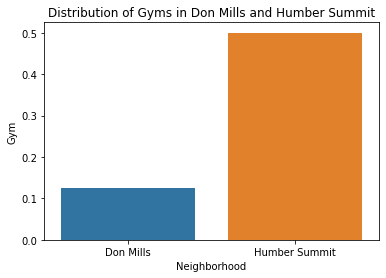

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(x="Neighborhood", y="Gym", data=gym)
plt.title("Distribution of Gyms in Don Mills and Humber Summit")
plt.show()

The above graph lets us visualize that Gyms are more common in **Humber Summit** than in **Don Mills**. Hence, if one has to choose from these two neighborhoods to stay in North York for better access to a Gym, Humber Summit is the best choice.

<hr>

## Plotting the Neighborhoods with no Gym

Let's use the folium Library to plot the neighborhoods with no Gym. We need to work a bit on the **no_gym** dataframe for that by adding latitude and longitude values of the neighborhoods.

In [23]:
plot_df = pd.merge(no_gym, new_df, how='inner', on="Neighborhood")
plot_df = plot_df[["Neighborhood", "Latitude", "Longitude"]]
plot_df.head()

,Neighborhood,Latitude,Longitude
0,"Bathurst Manor, Wilson Heights, Downsview North",43.754328,-79.442259
1,Bayview Village,43.786947,-79.385975
2,"Bedford Park, Lawrence Manor East",43.733283,-79.419750
3,Downsview,43.737473,-79.464763
4,Downsview,43.739015,-79.506944


In [24]:
map_nogym = folium.Map(location=[latitude, longitude], zoom_start=10)
for lat, lng, neighborhood in zip(plot_df['Latitude'], plot_df['Longitude'], plot_df['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker([lat, lng], radius=5, popup=label, color='blue', fill=True, fill_color="#3186cc", parse_html=False).add_to(map_nogym)
map_nogym

<hr>

## Clustering the Neighborhoods using K-Means Cluster

Let's cluster the neighborhoods using the K-Means Clustering Algorithms, then we will visualize it on a map.

In [25]:
k = 4
X = ny_grouped.drop('Neighborhood', axis = 1)
# run k-means clustering
kmeans = KMeans(n_clusters = k, random_state=0, init="k-means++")
kmeans.fit(X)

KMeans(n_clusters=4, random_state=0)

In [26]:
new_cluster_df = pd.merge(ny_grouped, ny_df, how='inner', on='Neighborhood')
new_cluster_df=new_cluster_df[["Neighborhood", "Latitude", "Longitude"]]
new_cluster_df.drop_duplicates(subset=["Neighborhood"], inplace=True)
new_cluster_df.set_index("Neighborhood", inplace=True)
new_cluster_df.reset_index(inplace=True)
new_cluster_df.head()

,Neighborhood,Latitude,Longitude
0,"Bathurst Manor, Wilson Heights, Downsview North",43.754328,-79.442259
1,Bayview Village,43.786947,-79.385975
2,"Bedford Park, Lawrence Manor East",43.733283,-79.419750
3,Don Mills,43.745906,-79.352188
4,Downsview,43.737473,-79.464763


In [27]:
new_cluster_df['Cluster_Labels'] = kmeans.labels_
new_cluster_df.head()

,Neighborhood,Latitude,Longitude,Cluster_Labels
0,"Bathurst Manor, Wilson Heights, Downsview North",43.754328,-79.442259,0
1,Bayview Village,43.786947,-79.385975,0
2,"Bedford Park, Lawrence Manor East",43.733283,-79.419750,0
3,Don Mills,43.745906,-79.352188,0
4,Downsview,43.737473,-79.464763,0


In [28]:
map_clustered = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(new_cluster_df['Latitude'], new_cluster_df['Longitude'],
                                  new_cluster_df['Neighborhood'], new_cluster_df['Cluster_Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clustered)
       
map_clustered

<hr>

## Conclusion

Hence, we see that we have only two neighborhoods that do not lack Gym. They are:

In [29]:
gym[["Neighborhood"]]

,Neighborhood
3,Don Mills
8,Humber Summit


The other neighborhoods that lack Gym, are:

In [30]:
no_gym[["Neighborhood"]]

,Neighborhood
0,"Bathurst Manor, Wilson Heights, Downsview North"
1,Bayview Village
2,"Bedford Park, Lawrence Manor East"
4,Downsview
5,"Fairview, Henry Farm, Oriole"
6,Glencairn
7,Hillcrest Village
9,"Humberlea, Emery"
10,"Lawrence Manor, Lawrence Heights"
11,"North Park, Maple Leaf Park, Upwood Park"


We have also clustered the neighborhood using the K-Means Clustering Algorithm. Also, our data analysis shows that if a fitness lover has to stay in North York, **Don Mills** and **Humber Summit** are the best choices. This is because they have Gyms as one of their most common venues.

<hr>

**Project authored and completed by:** Rajdeep Pathak

**Platform:** IBM Watson Studio, [IBM Cloud](cloud.ibm.com)

**Environment:** Python 3.7 (2vCPU, 8GB RAM)
<br>




21.12.2020
19:00 IST

Also published in a blog of [Gossipfunda](https://gossipfunda.com/), check it out by clicking **[here](https://gossipfunda.com/exploratory-data-analysis-with-k-means-clustering-algorithm/)**
